Linear Regression : Linear approach to modelling the relationship between dependent and one or more independent variable

- Hypothesis test :
Is there any relationship between X and Y:
$\hat{Y} =  {\beta}_{0} + {\beta}_{1}X   $

1. If ${\beta}_{1} $ is 0 means there is no relationship : H0
2. Ha : some relationship between X and Y, where $ {\beta}_{1} {\not =} {0} $ 

In [1]:
import statsmodels.api as sn

In [2]:
house_data = r'D:\MyStudy\ML_DL_Udemy\Machine Learning & Deep Learning in Python & R\Data Files\1. ST Academy - Crash course and Regression files/House_Price.csv'


In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv(house_data, header=0)


In [5]:
# np.percentile(df.n_hot_rooms, [99])    #99th percentile of n_hot_rooms column
uv = np.percentile(df.n_hot_rooms, [99])[0]

df.n_hot_rooms[(df.n_hot_rooms > 3*uv)] = 3*uv


C:\Users\kajal\AppData\Local\Temp\ipykernel_15316\2562070815.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.n_hot_rooms[(df.n_hot_rooms > 3*uv)] = 3*uv


In [6]:
lv = np.percentile(df.rainfall, [1])[0]
df.rainfall[(df.rainfall < 0.3*lv)] = 0.3*lv


C:\Users\kajal\AppData\Local\Temp\ipykernel_15316\159162367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rainfall[(df.rainfall < 0.3*lv)] = 0.3*lv


In [7]:
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())


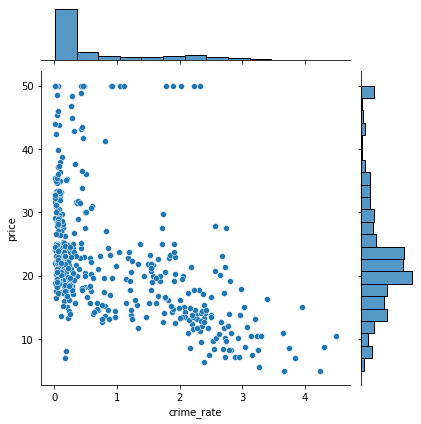

In [8]:
df.crime_rate = np.log(1+df.crime_rate)
sns.jointplot(x="crime_rate", y="price", data=df)


In [9]:
# Now lets delete these different disatnce variables

del df['dist1']
del df['dist2']
del df['dist3']
del df['dist4']


In [10]:
del df['bus_ter']


In [11]:
df = pd.get_dummies(df)


In [12]:
del df['airport_NO']
del df['waterbody_None']

In [13]:
df.corr()


,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
price,1.000000,-0.466527,-0.484754,-0.429300,0.696304,-0.377999,0.505655,-0.740836,0.108880,0.017007,-0.047200,-0.391574,0.182867,0.036233,-0.037497,0.071751
crime_rate,-0.466527,1.000000,0.660283,0.707587,-0.288784,0.559591,-0.390052,0.608970,-0.004089,0.056570,0.082151,0.638951,-0.134486,-0.025390,0.009076,-0.060099
resid_area,-0.484754,0.660283,1.000000,0.763651,-0.391676,0.644779,-0.383248,0.603800,0.005799,-0.003761,0.055845,0.707635,-0.115401,-0.026590,0.051649,-0.098976
air_qual,-0.429300,0.707587,0.763651,1.000000,-0.302188,0.731470,-0.188933,0.590879,-0.049553,0.007238,0.091956,0.915544,-0.073903,-0.046393,0.013849,-0.037772
room_num,0.696304,-0.288784,-0.391676,-0.302188,1.000000,-0.240265,0.355501,-0.613808,0.032009,0.014583,-0.064718,-0.282817,0.163774,-0.004195,0.010554,0.046251
age,-0.377999,0.559591,0.644779,0.731470,-0.240265,1.000000,-0.261515,0.602339,-0.021012,0.013918,0.074684,0.673850,0.005101,0.003452,-0.004354,-0.088609
teachers,0.505655,-0.390052,-0.383248,-0.188933,0.355501,-0.261515,1.000000,-0.374044,-0.008056,-0.037007,-0.045928,-0.187004,0.069437,0.048717,-0.046981,0.094256
poor_prop,-0.740836,0.608970,0.603800,0.590879,-0.613808,0.602339,-0.374044,1.000000,-0.066008,0.017036,0.061444,0.552310,-0.095054,0.003197,0.020620,-0.109004
n_hos_beds,0.108880,-0.004089,0.005799,-0.049553,0.032009,-0.021012,-0.008056,-0.066008,1.000000,-0.003130,0.058596,-0.071272,-0.006365,0.042278,0.059482,-0.074148
n_hot_rooms,0.017007,0.056570,-0.003761,0.007238,0.014583,0.013918,-0.037007,0.017036,-0.003130,1.000000,0.014869,0.023757,-0.055338,0.037925,0.014755,-0.064096


In [14]:
del df['parks']


In [15]:
df.head()


,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,1,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0,1,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0,0,0,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,1,1,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0,1,0,0


 Lets start building the model


In [16]:
X = sn.add_constant(df['room_num'])   # considering feature x as room num
# by default the statsmodels dont have beta0 , so adding constant

In [17]:

# define model
lm = sn.OLS(df['price'], X).fit()     # OLS : Ordinary Least Square

In [18]:
# to get summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     474.3
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           1.31e-74
Time:                        05:12:12   Log-Likelihood:                -1671.6
No. Observations:                 506   AIC:                             3347.
Df Residuals:                     504   BIC:                             3356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6592      2.642    -13.118      0.000     -39.850     -29.468
room_num       9.0997      0.418     21.779      0.000       8.279       9.921
==============================================================================
Omnibus:                      103.753   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              633.429
Skew:                           0.729   Prob(JB):                    2.84e-138
Kurtosis:                       8.284   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Another method to do linear regression in python, most commonly used

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
# define X and y variable 
y = df['price']    # y is dependent variable

# x - independent variable should be a 2-d array
X = df[['room_num']]


In [21]:
lm2 = LinearRegression()

In [22]:
lm2.fit(X, y)

LinearRegression()

In [23]:
print(lm2.intercept_, lm2.coef_)    # _ represents attribute

-34.659243123097184 [9.09966966]


In [24]:
help(lm2)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |   

In [25]:
# To predict values of y
lm2.predict(X)

array([25.17108491, 23.76973578, 30.72188341, 29.02024518, 30.37609596,
       23.85163281, 20.04797089, 21.50391804, 16.58099675, 19.97517353,
       23.36935032, 20.02067188, 18.92871152, 19.4746917 , 20.81234314,
       18.42822969, 19.34729633, 19.84777816, 14.98855456, 17.45456504,
       16.0259169 , 19.62028642, 21.23092795, 18.23713663, 19.24719996,
       16.28980732, 18.23713663, 20.36645933, 24.44311134, 26.07195221,
       17.32716966, 20.59395107, 19.48379137, 17.21797363, 20.81234314,
       19.32909699, 18.49192738, 18.57382441, 19.62938609, 25.3530783 ,
       29.25683659, 26.9455205 , 21.47661903, 21.85880515, 20.56665206,
       17.0450799 , 17.99144555, 20.21176495, 14.46987339, 16.31710633,
       19.60208708, 20.98523687, 24.58870605, 19.92057552, 18.91961185,
       31.30426226, 23.42394834, 27.3641053 , 21.25822696, 19.27449897,
       17.58196041, 19.62938609, 24.08822422, 26.87272314, 29.98481016,
       22.57767906, 18.00054522, 18.82861516, 16.24430897, 18.89

In [26]:
# plot the regression line
help(sns.jointplot)

Help on function jointplot in module seaborn.axisgrid:

jointplot(*, x=None, y=None, data=None, kind='scatter', color=None, height=6, ratio=5, space=0.2, dropna=False, xlim=None, ylim=None, marginal_ticks=False, joint_kws=None, marginal_kws=None, hue=None, palette=None, hue_order=None, hue_norm=None, **kwargs)
    Draw a plot of two variables with bivariate and univariate graphs.
    
    This function provides a convenient interface to the :class:`JointGrid`
    class, with several canned plot kinds. This is intended to be a fairly
    lightweight wrapper; if you need more flexibility, you should use
    :class:`JointGrid` directly.
    
    Parameters
    ----------
    x, y : vectors or keys in ``data``
        Variables that specify positions on the x and y axes.
    data : :class:`pandas.DataFrame`, :class:`numpy.ndarray`, mapping, or sequence
        Input data structure. Either a long-form collection of vectors that can be
        assigned to named variables or a wide-form datas

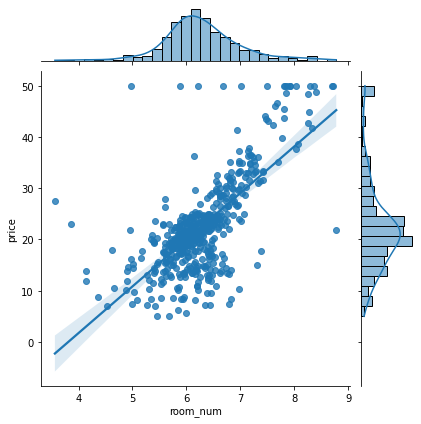

In [27]:
sns.jointplot(x = df['room_num'], y = df['price'], data = df, kind = 'reg')    # by default kind = scatter

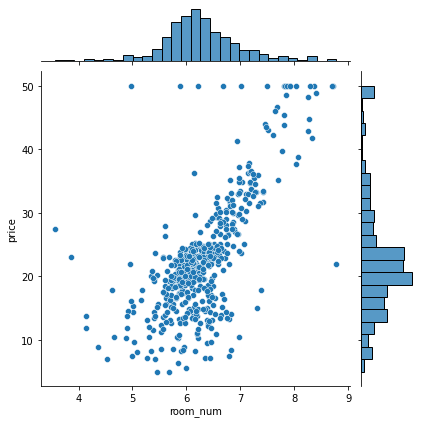

In [28]:
sns.jointplot(x = df['room_num'], y = df['price'], data = df)    # by default kind = scatter


Multiple Linear Regression: More than one predictor variable are used to predict the response variable

In [29]:
#define the model for Multiple regression

X_multi = df.drop("price", axis=1)     #except price column, drop columns along axis 1

In [30]:
X_multi.head()    # now contains all Independent variables

,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,1,0,0,1
1,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0,1,0,0
2,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0,0,0,0
3,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,1,1,0,0
4,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0,1,0,0


In [31]:
# Lets create dependent variable y
y_multi = df['price']

In [32]:
y_multi.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

In [33]:
# In Statsmodel, we have to add constant to our data 
X_multi_const = sn.add_constant(X_multi)

In [34]:
X_multi_const.head()

,const,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,1.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,1,0,0,1
1,1.0,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0,1,0,0
2,1.0,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0,0,0,0
3,1.0,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,1,1,0,0
4,1.0,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0,1,0,0


In [35]:
#built model object
lm_multi = sn.OLS(y_multi, X_multi_const).fit()

#key takeaway from this is observe the p-values,where greater than 50% must be considered

In [36]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     80.72
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          1.73e-117
Time:                        05:12:14   Log-Likelihood:                -1537.2
No. Observations:                 506   AIC:                             3104.
Df Residuals:                     491   BIC:                             3168.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -22.9545      4.791     -4.791      0.000     -32.368     -13.541
crime_rate                   0.0606      0.362      0.167      0.867      -0.651       0.772
resid_area                   0.0495      0.058      0.851      0.395      -0.065       0.164
air_qual                    -8.0878      3.971     -2.037      0.042     -15.890      -0.286
room_num                     4.2083      0.443      9.503      0.000       3.338       5.078
age                          0.0283      0.013      2.165      0.031       0.003       0.054
teachers                     0.9923      0.127      7.812      0.000       0.743       1.242
poor_prop                   -0.5972      0.055    -10.910      0.000      -0.705      -0.490
n_hos_beds                   0.4176      0.158      2.647      0.008       0.108       0.728
n_hot_rooms                  0.1077      0.085      1.261      0.208      -0.060       0.276
rainfall                     0.0088      0.019      0.476      0.634      -0.028       0.045
airport_YES                  1.2442      0.472      2.634      0.009       0.316       2.172
waterbody_Lake               0.2903      0.668      0.435      0.664      -1.022       1.603
waterbody_Lake and River    -0.5290      0.743     -0.712      0.477      -1.988       0.930
waterbody_River             -0.0615      0.568     -0.108      0.914      -1.177       1.054
==============================================================================
Omnibus:                      185.300   Durbin-Watson:                   0.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              810.037
Skew:                           1.594   Prob(JB):                    1.27e-176
Kurtosis:                       8.316   Cond. No.                     2.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Multi regression with sklearn

In [37]:
lm3 = LinearRegression()

In [38]:
lm3.fit(X_multi, y_multi)

LinearRegression()

In [39]:
print(lm3.intercept_, lm3.coef_)

-22.95454655727197 [ 0.06055013  0.04948637 -8.08775222  4.20825948  0.0282633   0.99232144
 -0.59716522  0.41762884  0.10774931  0.00881882  1.2442299   0.29026158
 -0.52903037 -0.06146604]


Train Test Split:

1.training error : performance of model on previously seen data
2. test error : performance of model on unseen data

- Train Test Split Techniques:
1. Validation set approach: 80: 20 split
2. Leave one out cross validation : leaving every observation every time from training set
3. K-Fold validation : one test fold, K-1 folds for training

Bias Variance Tradeoff : 
- Expected test error = E(bias) + E(variance)

1. E(Variance): Amount by which predicted function will change if we change training dataset
- variance leads to Overfitting -> following the data too closely
- with flexibility of models -> variance increases
2. E(Bias) : Error due to approaximation of complex relationship as a simpler model such as linear model
-- with flexibility of models -> bias error reduces


-Tradeoff: if we try to decrease one by changing model flexibility, other error increases

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

In [42]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 14) (102, 14) (404,) (102,)


In [43]:
# create a linear regression model for sklearn 
lm_a = LinearRegression()

In [44]:
# train model from training set
lm_a.fit(X_train, y_train)

LinearRegression()

In [45]:
#predict the values

y_test_a = lm_a.predict(X_test)

In [46]:
y_train_a = lm_a.predict(X_train)

In [47]:
# calculate R-square error
from sklearn.metrics import r2_score

In [48]:
r2_score?

Signature:
r2_score(
    y_true,
    y_pred,
    *,
    sample_weight=None,
    multioutput='uniform_average',
    force_finite=True,
)
Docstring:
:math:`R^2` (coefficient of determination) regression score function.

Best possible score is 1.0 and it can be negative (because the
model can be arbitrarily worse). In the general case when the true y is
non-constant, a constant model that always predicts the average y
disregarding the input features would get a :math:`R^2` score of 0.0.

In the particular case when ``y_true`` is constant, the :math:`R^2` score
is not finite: it is either ``NaN`` (perfect predictions) or ``-Inf``
(imperfect predictions). To prevent such non-finite numbers to pollute
higher-level experiments such as a grid search cross-validation, by default
these cases are replaced with 1.0 (perfect predictions) or 0.0 (imperfect
predictions) respectively. You can set ``force_finite`` to ``False`` to
prevent this fix from happening.

Note: when the prediction residuals hav

In [49]:
r2_score(y_test, y_test_a)     #r-square value for test set

0.6374043504970859

In [50]:
# r2-square value for test 
r2_score(y_train, y_train_a)

0.7057679278986911

Observe : r-square value of test data is less than train data, but test r-square value is always more important than train r-square value to evaluate the performance of the model

Other Linear Regression Techniques:
1. Sunbset Selection methods
2. Shrinkage method: This approach involves fitting a model involving all p predictors. However the estimated coefficients are shrunken towards zero relative to the least square estimates.
i. Ridge Regression / L2- Regression: RSS + lambda*(sum of all beta coeff)^2. The whole last term is introduced for penalty
- disadvantage of ridge regression : includes all the variables in final model, coeff shrinks towards zero, but not exactly 0.
ii. The Lasso / L1 - Regression : RSS + lambda*(sum of all abs. beta coeff) i.e |beta|
- For sufficiently large values of $ \lambda $ several coefficinets will actually become zero



We need to standardize our data before running Ridge and Lasso regression models

In [51]:
from sklearn import preprocessing

In [52]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [53]:
X_train_s = scaler.transform(X_train)

In [54]:
X_test_s = scaler.transform(X_test)

In [55]:
# Ridge Resgression
from sklearn.linear_model import Ridge

In [56]:
# create object
lm_r = Ridge(alpha=0.5)    # lambda is alpha in python
lm_r.fit(X_train_s, y_train)

Ridge(alpha=0.5)

In [57]:
r2_score(y_test, lm_r.predict(X_test_s))

0.6375191204883575

In [58]:
# we want to try out different lamda values for best fit 
# this can be done with validation curve

from sklearn.model_selection import validation_curve

In [59]:
validation_curve?


Signature:
validation_curve(
    estimator,
    X,
    y,
    *,
    param_name,
    param_range,
    groups=None,
    cv=None,
    scoring=None,
    n_jobs=None,
    pre_dispatch='all',
    verbose=0,
    error_score=nan,
    fit_params=None,
)
Docstring:
Validation curve.

Determine training and test scores for varying parameter values.

Compute scores for an estimator with different values of a specified
parameter. This is similar to grid search with one parameter. However, this
will also compute training scores and is merely a utility for plotting the
results.

Read more in the :ref:`User Guide <validation_curve>`.

Parameters
----------
estimator : object type that implements the "fit" and "predict" methods
    An object of that type which is cloned for each validation.

X : array-like of shape (n_samples, n_features)
    Training vector, where `n_samples` is the number of samples and
    `n_features` is the number of features.

y : array-like of shape (n_samples,) or (n_samples, 

In [60]:
# we will run the model multiple times and select best out of those

In [61]:
param_range = np.logspace(-2, 8, 100 )  #this logspace creates 100 values between 10^-2  and 10^8

In [62]:
param_range

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

In [63]:
# run iterations for model

train_score, test_score = validation_curve(Ridge(), X_train_s, y_train, param_name="alpha", param_range=param_range, scoring='r2')

In [64]:
print(train_score)
print(test_score)

# Note: we havn't given test set, it takes k-fold validation

[[6.97193116e-01 7.33338383e-01 7.10409224e-01 6.84486286e-01
  7.17671291e-01]
 [6.97193116e-01 7.33338383e-01 7.10409224e-01 6.84486286e-01
  7.17671291e-01]
 [6.97193115e-01 7.33338383e-01 7.10409223e-01 6.84486285e-01
  7.17671291e-01]
 [6.97193114e-01 7.33338382e-01 7.10409223e-01 6.84486285e-01
  7.17671290e-01]
 [6.97193113e-01 7.33338381e-01 7.10409221e-01 6.84486284e-01
  7.17671289e-01]
 [6.97193111e-01 7.33338379e-01 7.10409219e-01 6.84486282e-01
  7.17671287e-01]
 [6.97193108e-01 7.33338377e-01 7.10409215e-01 6.84486279e-01
  7.17671283e-01]
 [6.97193103e-01 7.33338373e-01 7.10409210e-01 6.84486274e-01
  7.17671278e-01]
 [6.97193095e-01 7.33338366e-01 7.10409201e-01 6.84486266e-01
  7.17671270e-01]
 [6.97193082e-01 7.33338355e-01 7.10409187e-01 6.84486254e-01
  7.17671257e-01]
 [6.97193062e-01 7.33338338e-01 7.10409164e-01 6.84486234e-01
  7.17671237e-01]
 [6.97193029e-01 7.33338311e-01 7.10409128e-01 6.84486203e-01
  7.17671204e-01]
 [6.97192978e-01 7.33338268e-01 7.104090

In [65]:
train_mean = np.mean(train_score, axis=1)

In [66]:
test_mean = np.mean(test_score, axis=1)

In [67]:
train_mean

array([7.08619660e-01, 7.08619660e-01, 7.08619660e-01, 7.08619659e-01,
       7.08619658e-01, 7.08619656e-01, 7.08619652e-01, 7.08619647e-01,
       7.08619640e-01, 7.08619627e-01, 7.08619607e-01, 7.08619575e-01,
       7.08619524e-01, 7.08619444e-01, 7.08619315e-01, 7.08619112e-01,
       7.08618788e-01, 7.08618273e-01, 7.08617457e-01, 7.08616162e-01,
       7.08614111e-01, 7.08610867e-01, 7.08605745e-01, 7.08597672e-01,
       7.08584982e-01, 7.08565095e-01, 7.08534050e-01, 7.08485804e-01,
       7.08411239e-01, 7.08296737e-01, 7.08122226e-01, 7.07858531e-01,
       7.07463909e-01, 7.06879613e-01, 7.06024389e-01, 7.04787870e-01,
       7.03022982e-01, 7.00537820e-01, 6.97088059e-01, 6.92371829e-01,
       6.86029913e-01, 6.77654537e-01, 6.66809214e-01, 6.53059477e-01,
       6.36010731e-01, 6.15346586e-01, 5.90861808e-01, 5.62488706e-01,
       5.30321448e-01, 4.94643496e-01, 4.55955889e-01, 4.14992298e-01,
       3.72700433e-01, 3.30176499e-01, 2.88558084e-01, 2.48900140e-01,
      

In [68]:
# Now we are only interested in the model which has highest r-square value
max(test_mean)

0.6762171499293077

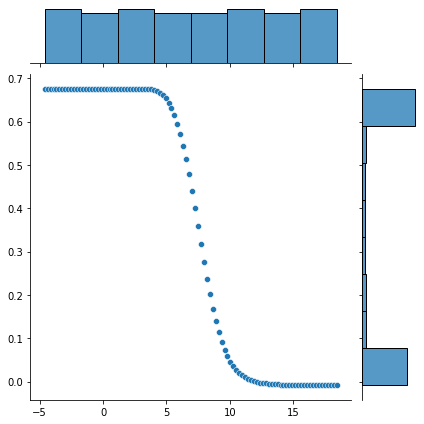

In [69]:
# Another way to see these r2 values
sns.jointplot(x=np.log(param_range), y=test_mean)

In [70]:
# to find the location for max r2 value
np.where(test_mean==max(test_mean))

(array([32], dtype=int64),)

In [71]:
#lets find lambda value for this max value
param_range[32]

17.073526474706906

In [72]:
# now will fit our ridge model for this lambda square value
lm_r_best = Ridge(alpha = param_range[32])

In [73]:
lm_r_best.fit(X_train_s, y_train)

Ridge(alpha=17.073526474706906)

In [74]:
# r-square for train data
r2_score(y_test, lm_r_best.predict(X_test_s))

0.6409122477655773

In [75]:
# r-square for test data
r2_score(y_train, lm_r_best.predict(X_train_s))

0.7050086845203525

In [76]:
from sklearn.linear_model import Lasso

In [77]:
lm_l = Lasso(alpha=0.4)

In [78]:
lm_l.fit(X_train_s, y_train)


Lasso(alpha=0.4)

In [79]:
r2_score(y_test, lm_l.predict(X_test_s))


0.6405590149743908

In [80]:
# We can see there is not much difference between ridge and lasso r-square value
train_score, test_score = validation_curve(Lasso(), X_train_s, y_train, param_name="alpha", param_range=param_range, scoring='r2')


In [81]:
print(train_score)
print(test_score)

[[6.97162219e-01 7.33305300e-01 7.10373355e-01 6.84455680e-01
  7.17642934e-01]
 [6.97143918e-01 7.33285704e-01 7.10351987e-01 6.84437529e-01
  7.17626248e-01]
 [6.97114780e-01 7.33254501e-01 7.10318143e-01 6.84408512e-01
  7.17599729e-01]
 [6.97068381e-01 7.33204816e-01 7.10264280e-01 6.84362446e-01
  7.17557492e-01]
 [6.96994502e-01 7.33125704e-01 7.10184351e-01 6.84289095e-01
  7.17490225e-01]
 [6.96876860e-01 7.32999730e-01 7.10058730e-01 6.84172299e-01
  7.17383102e-01]
 [6.96689537e-01 7.32799141e-01 7.09858731e-01 6.83986325e-01
  7.17212511e-01]
 [6.96394891e-01 7.32479739e-01 7.09540307e-01 6.83690199e-01
  7.16940857e-01]
 [6.95943491e-01 7.31971156e-01 7.09033325e-01 6.83218678e-01
  7.16528998e-01]
 [6.95464112e-01 7.31161342e-01 7.08226120e-01 6.82702162e-01
  7.16160696e-01]
 [6.94858374e-01 7.30101574e-01 7.06948496e-01 6.82032652e-01
  7.15602718e-01]
 [6.94134096e-01 7.29133734e-01 7.05725216e-01 6.80966961e-01
  7.14761215e-01]
 [6.92995058e-01 7.27983985e-01 7.039844

In [82]:
train_mean = np.mean(train_score, axis=1)
test_mean = np.mean(test_score, axis=1)


In [83]:
max(test_mean)

0.6752946078225113

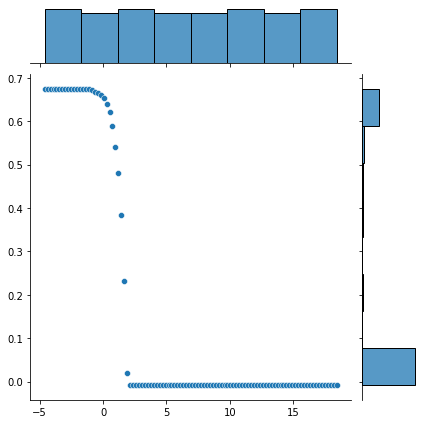

In [84]:
sns.jointplot(x=np.log(param_range), y=test_mean)


In [85]:
np.where(test_mean==max(test_mean))


(array([4], dtype=int64),)

In [86]:
# param_range[4]

In [87]:
# lm_l_best = Lasso(alpha = param_range[4])


In [88]:
lm_l_best = Lasso(alpha=param_range[np.argmax(test_mean)])


In [89]:
lm_l_best.fit(X_train_s, y_train)


Lasso(alpha=0.025353644939701114)

In [90]:
r2_score(y_test, lm_l_best.predict(X_test_s))


0.6394069702905938

There is not much difference between the Ridge and Lasso r-square values

Heteroscedasticity Problem : 
- Magnitude of residuals tends to increase with predicted values of y
- Assumption in Linear Regression : Variance of error term is independent of values of y
- Solution : Scale down Y variable using log(y) or $ \sqrt y $